## Self coding/implementation of a 3 layer neural network (activation=sigmoid)
The original version is at backup (10)
<br/>

<font color="red">
Here we use multiporcessing to run fit() multiple times and choose the best params with highest accuracy
</font>


In [1]:
import numpy as np
import matplotlib.pyplot as plt
def percentage(x):return f"{round(100*x,4)}%"

In [2]:
def sigmoid(t):return 1/(1+np.exp(-t))


### Try a simple classification to verify it's correct

<font color="red">I am so happy this code implementation worked as I expected even without any debugging.\
    WOW!
</font>


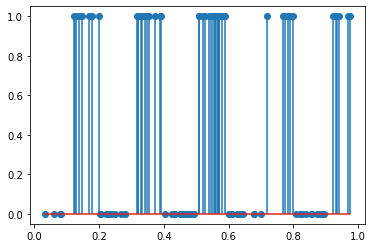

In [24]:
from functools import reduce
#data-set stuff
# m = 1000 #number of examples
# x_train = np.random.rand(m,N)
# y_train = (x_train>0.5).astype(np.int16)

m = 100

# pos_x = 0.25 + 0.5 * np.random.rand(m//2,1)
# neg_x1 = 0 + 0.25 * np.random.rand(m//4,1)
# neg_x2 = 0.75 + 0.25 * np.random.rand(m//4,1)
# neg_x = np.concatenate((neg_x1,neg_x2))

x_train = np.random.rand(m,1)



# x_train = np.concatenate((pos_x,neg_x))
y_train = reduce(np.logical_or,[np.logical_and(0.1<x_train,x_train<0.2),
                                np.logical_and(0.3<x_train,x_train<0.4),
                                np.logical_and(0.5<x_train,x_train<0.6),
                                np.logical_and(0.7<x_train,x_train<0.8),
                                np.logical_and(0.9<x_train,x_train<1)]).astype(np.int16)



# x_y = np.hstack((x_train.reshape(-1,1),y_train.reshape(-1,1)))
# print(x_y)





fig,ax = plt.subplots(1)
ax.stem(x_train,y_train)


#define the node counts
N = 10 #number of input elements
H = 16 #number of hidden elements
M = 1 #number of output elements



#feature engineering
x_train_ = x_train
for i in range(2,N+1):
    x_train_ = np.hstack((x_train_,x_train**i))
    
x_train = x_train_

In [4]:
def fit():
    #our convension of x,y is different
    x = x_train.T
    y = y_train.T



    #initialize the parameters as arrays with proper dimensions
    W = np.random.rand(H,N)
    b = np.random.rand(H)
    V = np.random.rand(M,H)
    c = np.random.rand(M)

    cost_history = []

    n_iters = 4_00_000
    for _ in range(n_iters):

        #forward pass calculations
        h = sigmoid(W @ x + b.reshape(-1,1))
        y_hat = sigmoid(V @ (h) + c.reshape(-1,1))

        #y_hat_alpha - y_alpha
        diff = y_hat - y
        dSigmoidFactor_y_hat = y_hat * (1 - y_hat)

        intermediate_0 = diff * dSigmoidFactor_y_hat

        #fine tune c
        dE_dcALLAlpha = np.sum(intermediate_0, axis = 1)/m #dim = (M,)
        ##completely found :E_dcALLAlpha


        dE_dVALLAlphaALLBeta = np.zeros((M,H))
        for beta in range(H):
            dE_dVALLAlphaThisBeta = np.sum(intermediate_0 * h[beta,:], axis=1) /m
            dE_dVALLAlphaALLBeta[:,beta] = dE_dVALLAlphaThisBeta
        ##completely found :dE_dVALLAlphaALLBeta


        dE_dbALLAlpha = np.zeros(H)
        dE_dWALLAlpha_ALLBeta = np.zeros((H,N))

        for alpha in range(H):

            dSigmoidFactor_h_alpha = h[alpha,:] #temp
            dSigmoidFactor_h_alpha *= 1- dSigmoidFactor_h_alpha #done

            intermediate_1 = intermediate_0 * V[:,alpha].reshape(-1,1) * dSigmoidFactor_h_alpha
            dE_dbThisAlpha= np.sum(intermediate_1)/m
            dE_dbALLAlpha[alpha] = dE_dbThisAlpha

            for beta in range(N):
                dE_dWThisAlphaThisBeta= np.sum(intermediate_1 * x[beta,:])/m
                dE_dWALLAlpha_ALLBeta[alpha,beta] = dE_dWThisAlphaThisBeta
        ##completely found :dE_dbALLAlpha
        ##completely found :dE_dWALLAlpha_ALLBeta


        #All derivatives are now found

        #calc the cost now
        cost = np.sum(y_hat - y)/(2*m)
        cost_history.append(cost)

        ## Update parameters :: Gradient decesnt
        lr = 1

        c -= lr * dE_dcALLAlpha
        V -= lr * dE_dVALLAlphaALLBeta
        b -= lr * dE_dbALLAlpha
        W -= lr * dE_dWALLAlpha_ALLBeta




    print("Calculated weights)")
    print("c:",c)
    print("V:",V)
    print("b:",b)
    print("W:",W)
    plt.plot(np.log(cost_history))
    print("Final cost is:",cost_history[-1])
    return (c,V,b,W),cost_history


In [5]:
def predict(x_test,c,V,b,W):
    x = x_test.T
    h = sigmoid(W @ x + b.reshape(-1,1))
    y_hat = sigmoid(V @ (h) + c.reshape(-1,1))
    y_predicted = y_hat.T>0.5
    return y_predicted,x,h,y_hat


In [6]:
def fit_then_eval4accuracy():
    (c,V,b,W),cost_history = fit()
    
        #calc accuracy
    y_pred = predict(x_train,c,V,b,W)[0]
    accuracy = np.sum(y_pred == y_train)/np.prod(y_pred.shape)
    return accuracy,cost_history,(c,V,b,W)
    

In [7]:
## multiprocessing part
from joblib import Parallel, delayed
import time


    
    
    
results = Parallel(n_jobs=6)((
                              
                              delayed(fit_then_eval4accuracy)(),
                              delayed(fit_then_eval4accuracy)(),
                              delayed(fit_then_eval4accuracy)(),
                              delayed(fit_then_eval4accuracy)(),
                              delayed(fit_then_eval4accuracy)(),
                              delayed(fit_then_eval4accuracy)()
                                                           
                             ))




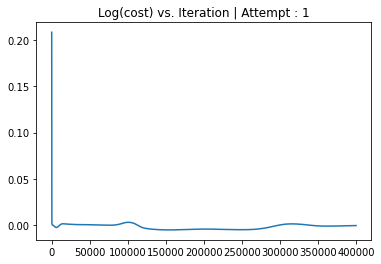

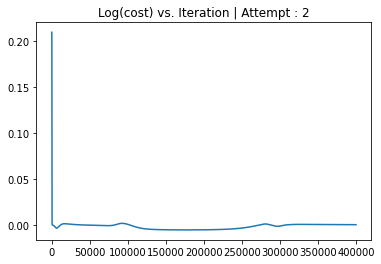

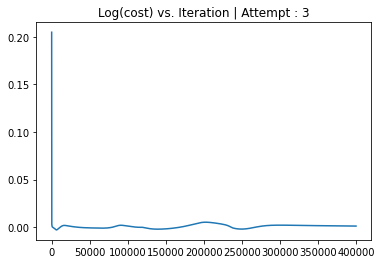

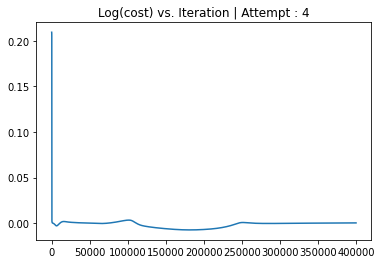

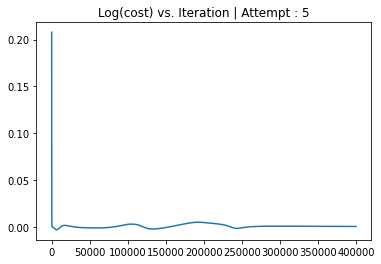

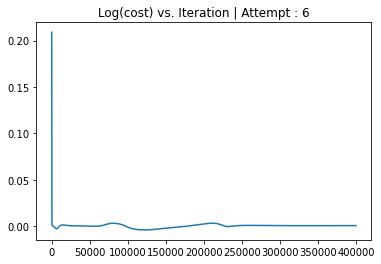

Best accuracy at: i =  0 /total = 6  accuracy =  100.0%


In [13]:

accuracies = []
params = []
i=0
for accuracy,cost_history,(c,V,b,W) in results:
    i+=1
    params.append((c,V,b,W))
    accuracies.append(accuracy)
    fig,ax = plt.subplots(1)
    ax.plot(cost_history)
    ax.set_title(f'Log(cost) vs. Iteration | Attempt : {i}')
    plt.show()
    
best_accuracy_at = np.argmax(accuracies)
print("Best accuracy at: i = ",best_accuracy_at,"/total =",len(accuracies),' accuracy = ',percentage(accuracies[best_accuracy_at]))

In [9]:
print("all accuracies:", accuracies)

all accuracies: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [10]:

params

[(array([2.67459256]),
  array([[-15.48448458,  17.31372311, -25.15108863,   3.71494107,
           25.00019236,   7.32423784, -19.08305544,   5.59565519,
            5.49790409, -15.03350126, -13.2533298 ,  24.97039817,
           25.34404743,  18.80087773,  -8.19035316,   6.94279732]]),
  array([-13.77552405,  -8.69880128,   2.40041401,   0.8189967 ,
           3.63024387,  -5.35837101,   7.41071686,  -0.85626393,
          -4.59769488,   2.86543455,   2.42185953, -17.96576686,
           9.43478825,  -9.77262983,   1.58374973,  -5.95298215]),
  array([[  4.21469407,  11.72027942,  13.55830964,  13.178377  ,
           11.34300978,   8.82707667,   6.80598635,   4.39162692,
            3.19570928,   2.42266756],
         [ -3.62398745,  -2.96352773,  -1.23508592,   0.65643873,
            2.51104003,   4.59170149,   5.08732857,   6.07268563,
            7.81777065,   7.82602549],
         [-35.51432924,   3.41695162,   9.97953515,  10.89086274,
           11.63058848,  10.83665854,  1

In [25]:
y_pred = predict(x_train,*params[0])[0]

acc = np.sum((y_pred == y_train)) / len(x_train)
print(acc)

0.96
